### EE399 HW1
### Xinqi Chen April 4, 2023

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

#### part i

A = 2.17
B = 0.91
C = 0.73
D = 31.45
Minimum error: 1.59


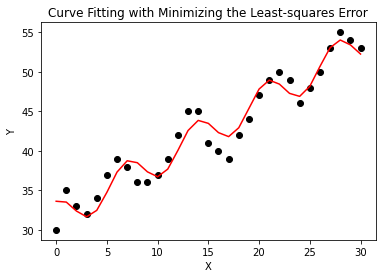

In [28]:
# Define the model function
def model_func(params, x, y):
    A, B, C, D = params
    return np.sqrt(np.sum((y - (A*np.cos(B*x) + C*x + D))**2)/len(x))

# Define the data
X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# Minimize the least-squares error between the model and the data with initial guess
result = minimize(model_func, x0=[3, 1*np.pi/4, 2/3, 32], args=(X, Y), method='Nelder-Mead')

# Print the values of A, B, C, and D
print("A = {:.2f}".format(result.x[0]))
print("B = {:.2f}".format(result.x[1]))
print("C = {:.2f}".format(result.x[2]))
print("D = {:.2f}".format(result.x[3]))

# Calculate the minimum error between the model and the data
y_fit = result.x[0]*np.cos(result.x[1]*X) + result.x[2]*X + result.x[3]
print("Minimum error: {:.2f}".format(result.fun))

plt.plot(np.arange(0, 31), Y, 'ko')
plt.plot(X, y_fit, 'r-')
plt.title("Curve Fitting with Minimizing the Least-squares Error")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### part ii

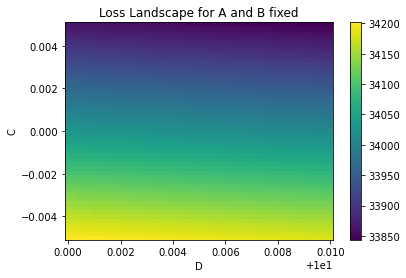

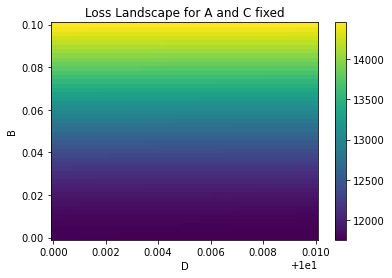

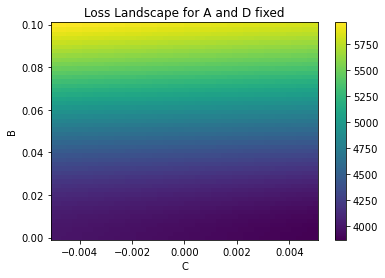

In [3]:
# Define the model function
def model_func(params, x, y):
    A, B, C, D = params
    return np.sum((y - (A*np.cos(B*x) + C*x + D))**2)

# Define the data
X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# Sweep through values of A and B
C_vals = np.linspace(-0.005, 0.005, 50)
D_vals = np.linspace(10, 10.01, 50)
A_vals = np.zeros((len(C_vals), len(D_vals)))
B_vals = np.zeros((len(C_vals), len(D_vals)))
for i, C in enumerate(C_vals):
    for j, D in enumerate(D_vals):
        params = [result.x[0], result.x[1], C, D]
        A_vals[i, j] = model_func(params, X, Y)
        B_vals[i, j] = result.x[1]
plt.figure()
plt.pcolor(D_vals, C_vals, A_vals, shading='auto')
plt.xlabel("D")
plt.ylabel("C")
plt.title("Loss Landscape for A and B fixed")
plt.colorbar()
plt.show()

# Sweep through values of A and C
B_vals = np.linspace(0, 0.1, 50)
D_vals = np.linspace(10, 10.01, 50)
A_vals = np.zeros((len(B_vals), len(D_vals)))
C_vals = np.zeros((len(B_vals), len(D_vals)))
for i, B in enumerate(B_vals):
    for j, D in enumerate(D_vals):
        params = [result.x[0], B, result.x[2], D]
        A_vals[i, j] = model_func(params, X, Y)
        C_vals[i, j] = result.x[2]
plt.figure()
plt.pcolor(D_vals, B_vals, A_vals, shading='auto')
plt.xlabel("D")
plt.ylabel("B")
plt.title("Loss Landscape for A and C fixed")
plt.colorbar()
plt.show()

# Sweep through values of A and D
B_vals = np.linspace(0, 0.1, 50)
C_vals = np.linspace(-0.005, 0.005, 50)
A_vals = np.zeros((len(B_vals), len(C_vals)))
D_vals = np.zeros((len(B_vals), len(C_vals)))
for i, B in enumerate(B_vals):
    for j, C in enumerate(C_vals):
        params = [result.x[0], B, C, result.x[3]]
        A_vals[i, j] = model_func(params, X, Y)
        D_vals[i, j] = result.x[3]
plt.figure()
plt.pcolor(C_vals, B_vals, A_vals, shading='auto')
plt.xlabel("C")
plt.ylabel("B")
plt.title("Loss Landscape for A and D fixed")
plt.colorbar()
plt.show()

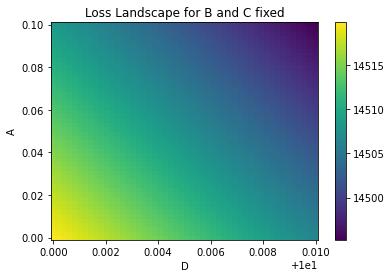

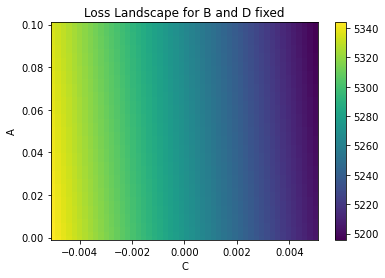

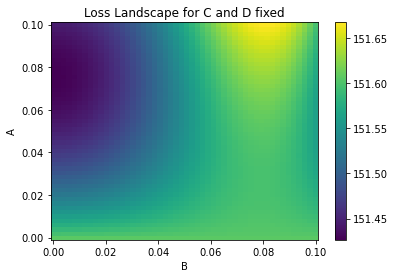

In [4]:
# Sweep through values of B and C
A_vals = np.linspace(0, 0.1, 50)
D_vals = np.linspace(10, 10.01, 50)
B_vals = np.zeros((len(A_vals), len(D_vals)))
C_vals = np.zeros((len(A_vals), len(D_vals)))
for i, A in enumerate(A_vals):
    for j, D in enumerate(D_vals):
#         result = minimize(model_func, [A_vals[i], 0.1, 0, D_vals[j]], args=(X, Y))
#         B_vals[i, j] = result.x[1]
#         C_vals[i, j] = result.x[2]
        params = [A, result.x[1], result.x[2], D]
        B_vals[i, j] = model_func(params, X, Y)
        C_vals[i, j] = result.x[2]
plt.figure()
plt.pcolor(D_vals, A_vals, B_vals, shading='auto')
plt.xlabel("D")
plt.ylabel("A")
plt.title("Loss Landscape for B and C fixed")
plt.colorbar()
plt.show()

# Sweep through values of B and D
A_vals = np.linspace(0, 0.1, 50)
C_vals = np.linspace(-0.005, 0.005, 50)
B_vals = np.zeros((len(A_vals), len(C_vals)))
D_vals = np.zeros((len(A_vals), len(C_vals)))
for i, A in enumerate(A_vals):
    for j, C in enumerate(C_vals):
        params = [A, result.x[1], C, result.x[3]]
        B_vals[i, j] = model_func(params, X, Y)
        D_vals[i, j] = result.x[3]
plt.figure()
plt.pcolor(C_vals, A_vals, B_vals, shading='auto')
plt.xlabel("C")
plt.ylabel("A")
plt.title("Loss Landscape for B and D fixed")
plt.colorbar()
plt.show()

# Sweep through values of C and D
A_vals = np.linspace(0, 0.1, 50)
B_vals = np.linspace(0, 0.1, 50)
C_vals = np.zeros((len(A_vals), len(B_vals)))
D_vals = np.zeros((len(A_vals), len(B_vals)))
for i, A in enumerate(A_vals):
    for j, B in enumerate(B_vals):
        params = [A, B, result.x[2], result.x[3]]
        C_vals[i, j] = model_func(params, X, Y)
        D_vals[i, j] = result.x[3]
plt.figure()
plt.pcolor(B_vals, A_vals, C_vals, shading='auto')
plt.xlabel("B")
plt.ylabel("A")
plt.title("Loss Landscape for C and D fixed")
plt.colorbar()
plt.show()

#### part iii

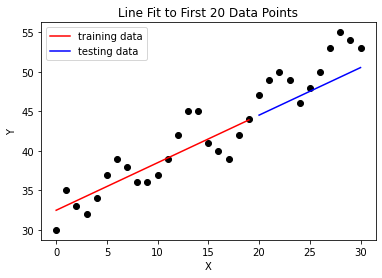

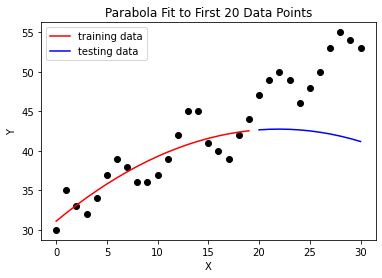

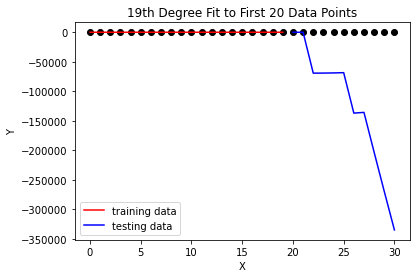

Training errors:
Line: 2.24
Parabola: 2.13
19th degree polynomial: 0.00

Test errors:
Line: 3.36
Parabola: 8.71
19th degree polynomial: 160377.11


In [22]:
# Define the data
X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])
X_train = X[:20]
Y_train = Y[:20]
X_test = X[20:]
Y_test = Y[20:]

# Fit a line to the training data
A = np.vstack([X_train, np.ones(len(X_train))]).T
m, b = np.linalg.lstsq(A, Y_train, rcond=None)[0]
Y_line_train = m*X_train + b
Y_line_test = m*X_test + b
line_error_train = np.sqrt(np.sum((Y_train - Y_line_train)**2)/len(X_train))
line_error_test = np.sqrt(np.sum((Y_test - Y_line_test)**2)/len(X_test))
plt.figure()
plt.title("Line Fit to First 20 Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(np.arange(0, 31), Y, 'ko')
plt.plot(X_train, Y_line_train, 'r-', label='training data')
plt.plot(X_test, Y_line_test, 'b-', label='testing data')
plt.legend()
plt.show()

# Fit a parabola to the training data
A = np.vstack([X_train**2, X_train, np.ones(len(X_train))]).T
a, b, c = np.linalg.lstsq(A, Y_train, rcond=None)[0]
Y_parabola_train = a*X_train**2 + b*X_train + c
Y_parabola_test = a*X_test**2 + b*X_test + c
parabola_error_train = np.sqrt(np.sum((Y_train - Y_parabola_train)**2)/len(X_train))
parabola_error_test = np.sqrt(np.sum((Y_test - Y_parabola_test)**2)/len(X_test))
plt.figure()
plt.title("Parabola Fit to First 20 Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(np.arange(0, 31), Y, 'ko')
plt.plot(X_train, Y_parabola_train, 'r-', label='training data')
plt.plot(X_test, Y_parabola_test, 'b-', label='testing data')
plt.legend()
plt.show()

# Fit a 19th degree polynomial to the training data
A = np.zeros((len(X_train), 20))
for i in range(20):
    A[:, i] = X_train**i
coeffs = np.linalg.lstsq(A, Y_train, rcond=None)[0]
Y_poly_train = np.zeros(len(X_train))
Y_poly_test = np.zeros(len(X_test))
for i in range(20):
    Y_poly_train += coeffs[i]*X_train**i
    Y_poly_test += coeffs[i]*X_test**i
poly_error_train = np.sqrt(np.sum((Y_train - Y_poly_train)**2)/len(X_train))
poly_error_test = np.sqrt(np.sum((Y_test - Y_poly_test)**2)/len(X_test))
plt.figure()
plt.title("19th Degree Fit to First 20 Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(np.arange(0, 31), Y, 'ko')
plt.plot(X_train, Y_poly_train, 'r-', label='training data')
plt.plot(X_test, Y_poly_test, 'b-', label='testing data')
plt.legend()
plt.show()

# Print the errors
print("Training errors:")
print("Line: {:.2f}".format(line_error_train))
print("Parabola: {:.2f}".format(parabola_error_train))
print("19th degree polynomial: {:.2f}".format(poly_error_train))
print()
print("Test errors:")
print("Line: {:.2f}".format(line_error_test))
print("Parabola: {:.2f}".format(parabola_error_test))
print("19th degree polynomial: {:.2f}".format(poly_error_test))

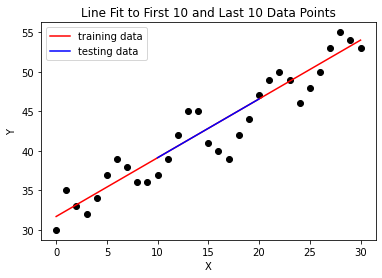

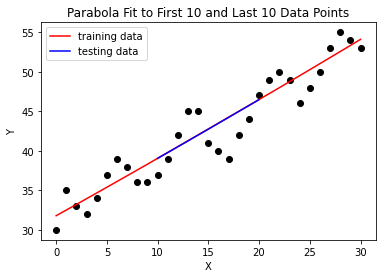

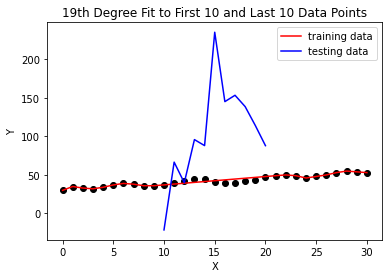

Training errors:
Line: 1.85
Parabola: 1.85
19th degree polynomial: 0.00

Test errors:
Line: 2.81
Parabola: 2.77
19th degree polynomial: 88.55


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate the data
X = np.arange(31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# Use the first 10 and the last 10 data points as training data
X_train = np.concatenate((X[:10], X[-10:]))
Y_train = np.concatenate((Y[:10], Y[-10:]))
X_test = X[10:21]
Y_test = Y[10:21]

# Fit a line to the training data
A = np.vstack([X_train, np.ones(len(X_train))]).T
m, b = np.linalg.lstsq(A, Y_train, rcond=None)[0]
Y_line_train = m*X_train + b
Y_line_test = m*X_test + b
line_error_train = np.sqrt(np.sum((Y_train - Y_line_train)**2)/len(X_train))
line_error_test = np.sqrt(np.sum((Y_test - Y_line_test)**2)/len(X_test))
plt.figure()
plt.title("Line Fit to First 10 and Last 10 Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(np.arange(0, 31), Y, 'ko')
plt.plot(X_train, Y_line_train, 'r-', label='training data')
plt.plot(X_test, Y_line_test, 'b-', label='testing data')
plt.legend()
plt.show()

# Fit a parabola to the training data
A = np.vstack([X_train**2, X_train, np.ones(len(X_train))]).T
a, b, c = np.linalg.lstsq(A, Y_train, rcond=None)[0]
Y_parabola_train = a*X_train**2 + b*X_train + c
Y_parabola_test = a*X_test**2 + b*X_test + c
parabola_error_train = np.sqrt(np.sum((Y_train - Y_parabola_train)**2)/len(X_train))
parabola_error_test = np.sqrt(np.sum((Y_test - Y_parabola_test)**2)/len(X_test))
plt.figure()
plt.title("Parabola Fit to First 10 and Last 10 Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(np.arange(0, 31), Y, 'ko')
plt.plot(X_train, Y_parabola_train, 'r-', label='training data')
plt.plot(X_test, Y_parabola_test, 'b-', label='testing data')
plt.legend()
plt.show()

# Fit a 19th degree polynomial to the training data
A = np.zeros((len(X_train), 20))
for i in range(20):
    A[:, i] = X_train**i
coeffs = np.linalg.lstsq(A, Y_train, rcond=None)[0]
Y_poly_train = np.zeros(len(X_train))
Y_poly_test = np.zeros(len(X_test))
for i in range(20):
    Y_poly_train += coeffs[i]*X_train**i
    Y_poly_test += coeffs[i]*X_test**i
poly_error_train = np.sqrt(np.sum((Y_train - Y_poly_train)**2)/len(X_train))
poly_error_test = np.sqrt(np.sum((Y_test - Y_poly_test)**2)/len(X_test))
plt.figure()
plt.title("19th Degree Fit to First 10 and Last 10 Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(np.arange(0, 31), Y, 'ko')
plt.plot(X_train, Y_poly_train, 'r-', label='training data')
plt.plot(X_test, Y_poly_test, 'b-', label='testing data')
plt.legend()
plt.show()

# Print the errors
print("Training errors:")
print("Line: {:.2f}".format(line_error_train))
print("Parabola: {:.2f}".format(parabola_error_train))
print("19th degree polynomial: {:.2f}".format(poly_error_train))
print()
print("Test errors:")
print("Line: {:.2f}".format(line_error_test))
print("Parabola: {:.2f}".format(parabola_error_test))
print("19th degree polynomial: {:.2f}".format(poly_error_test))